German Traffic Sign Recognition Benchmark GTSRB
===============================================
## Episode 2 : First convolutions

---
CNN with Tensorflow and Keras  
pjluc 2019 - CNRS/DEVLOG - Formation Deep Learning

## 1/ Import and init 

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

import deepmods.pwk as ooo

ooo.init()


Deepmod/pwk by pjluc 2019
  Version            : 0.1.0
  Run time           : Friday 27 December 2019, 22:52:24
  Matplotlib style   : deepmods/talk.mplstyle
  TensorFlow version :  1.14.0
  Keras version      :  2.2.4-tf


## 2/ Reload dataset

In [17]:
%%time

img_rows, img_cols = 25,25

x_train = np.load('./data/x_train_v2.npy')
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, 1)
y_train = np.load('./data/y_train_v2.npy')

x_test = np.load('./data/x_test_v2.npy')
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, 1)
y_test = np.load('./data/y_test_v2.npy')

input_shape = (img_rows, img_cols, 1)


CPU times: user 15.6 ms, sys: 297 ms, total: 312 ms
Wall time: 321 ms


## 3/ Have a look to the dataset

x_train :  (39209, 25, 25, 1)
y_train :  (39209,)
x_test  :  (12630, 25, 25, 1)
y_test  :  (12630,)


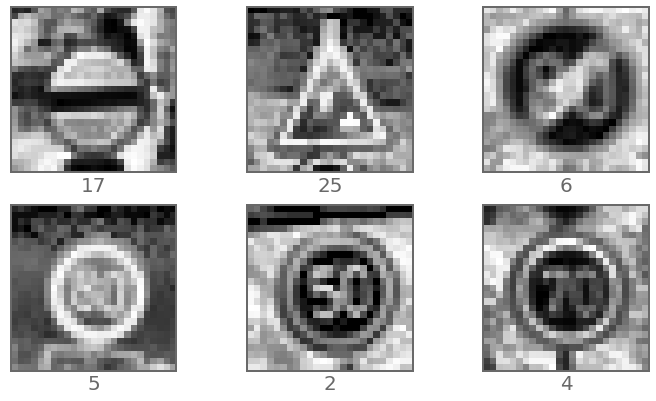

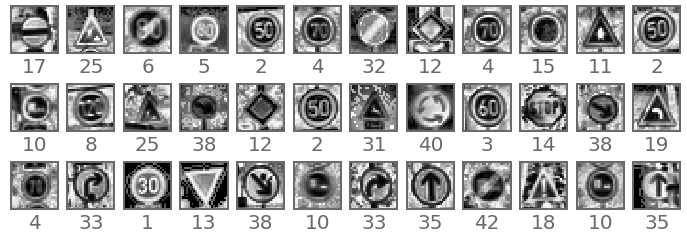

In [18]:
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

ooo.plot_images(x_train.reshape(-1,img_rows,img_cols),y_train, range(6),  columns=3, x_size=4, y_size=3)
ooo.plot_images(x_train.reshape(-1,img_rows,img_cols),y_train, range(36), columns=12, x_size=1, y_size=1)

## 4/ Create model

In [19]:
batch_size  =  64
num_classes =  43
epochs      =  5

In [20]:
model = keras.models.Sequential()
model.add( keras.layers.Conv2D(48, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 1))) # 25->24
model.add( keras.layers.MaxPooling2D((2, 2))) # 12
model.add( keras.layers.Conv2D(96, (3, 3), activation='relu')) #11
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(1536, activation='relu')) # 576
model.add( keras.layers.Dense(500, activation='relu'))
model.add( keras.layers.Dense(500, activation='relu'))
model.add( keras.layers.Dense(43, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 23, 23, 48)        480       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 96)          41568     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1536)              2360832   
_________________________________________________________________
dense_9 (Dense)              (None, 500)              

In [21]:
%%time

history = model.fit(  x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 39209 samples, validate on 12630 samples
Epoch 1/5
39209/39209 [==============================] - 14s 358us/sample - loss: 0.7138 - acc: 0.7917 - val_loss: 0.3566 - val_acc: 0.9112
Epoch 2/5
39209/39209 [==============================] - 14s 354us/sample - loss: 0.0920 - acc: 0.9726 - val_loss: 0.3150 - val_acc: 0.9205
Epoch 3/5
39209/39209 [==============================] - 15s 386us/sample - loss: 0.0529 - acc: 0.9843 - val_loss: 0.2792 - val_acc: 0.9305
Epoch 4/5
39209/39209 [==============================] - 16s 405us/sample - loss: 0.0350 - acc: 0.9889 - val_loss: 0.2860 - val_acc: 0.9306
Epoch 5/5
39209/39209 [==============================] - 16s 397us/sample - loss: 0.0330 - acc: 0.9897 - val_loss: 0.2647 - val_acc: 0.9339
CPU times: user 5min 42s, sys: 17.3 s, total: 6min
Wall time: 1min 15s


In [23]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

12630/12630 [==============================] - 2s 155us/sample - loss: 0.2647 - acc: 0.9339
Test loss      : 0.2647
Test accuracy  : 0.9339
